# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


In [4]:
print(cities)

['grytviken', 'clovis', 'ust-nera', 'hami', 'iskateley', 'sao jose da coroa grande', 'kudahuvadhoo', 'jamestown', 'toga village', 'edinburgh of the seven seas', 'mount pearl', 'bonthe', 'port-aux-francais', 'kerikeri', 'tazacorte', 'isafjordur', 'novokayakent', 'illela', 'bilibino', 'cabo san lucas', 'arraial do cabo', 'carnarvon', 'novo aripuana', 'avarua', 'petropavlovsk-kamchatsky', "gergebil'", 'longyearbyen', 'papatowai', 'lewistown', 'hunchun', 'ampanihy', 'taiohae', 'puerto natales', 'lagunas', 'dauphin', 'banff', 'thompson', 'bracebridge', 'qala i naw', 'keflavik', 'cairns city', 'jeddah', 'bethel', "nar'yan-mar", 'coquimbo', 'nuuk', 'chegdomyn', 'champerico', 'queenstown', 'vadso', 'san julian', 'chihuahua', 'hailey', 'enewetak', 'klyuchi', 'puerto ayora', 'apaxtla de castrejon', 'invercargill', 'nicoya', 'atafu village', 'blackmans bay', 'jardim do serido', 'chongjin', 'punta arenas', 'las lomitas', 'wusong', 'georgetown', 'adamstown', "st. john's", 'guasdualito', 'khark', 'a

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []


# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + f"q={cities[i]}&units=imperial&appid={weather_api_key}"

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | clovis
Processing Record 3 of Set 1 | ust-nera
Processing Record 4 of Set 1 | hami
Processing Record 5 of Set 1 | iskateley
Processing Record 6 of Set 1 | sao jose da coroa grande
Processing Record 7 of Set 1 | kudahuvadhoo
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | toga village
City not found. Skipping...
Processing Record 10 of Set 1 | edinburgh of the seven seas
Processing Record 11 of Set 1 | mount pearl
Processing Record 12 of Set 1 | bonthe
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | kerikeri
Processing Record 15 of Set 1 | tazacorte
Processing Record 16 of Set 1 | isafjordur
Processing Record 17 of Set 1 | novokayakent
Processing Record 18 of Set 1 | illela
Processing Record 19 of Set 1 | bilibino
Processing Record 20 of Set 1 | cabo san lucas
Processing Record 21 of Set 1 | arraial 

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,32.18,85,88,10.16,GS,1716056601
1,clovis,36.8252,-119.7029,82.62,51,40,4.61,US,1716056896
2,ust-nera,64.5667,143.2000,39.54,99,100,3.65,RU,1716056644
3,hami,42.8000,93.4500,80.26,17,100,3.47,CN,1716057134
4,iskateley,67.6803,53.1512,35.02,92,100,21.00,RU,1716057134


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,32.18,85,88,10.16,GS,1716056601
1,clovis,36.8252,-119.7029,82.62,51,40,4.61,US,1716056896
2,ust-nera,64.5667,143.2000,39.54,99,100,3.65,RU,1716056644
3,hami,42.8000,93.4500,80.26,17,100,3.47,CN,1716057134
4,iskateley,67.6803,53.1512,35.02,92,100,21.00,RU,1716057134


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

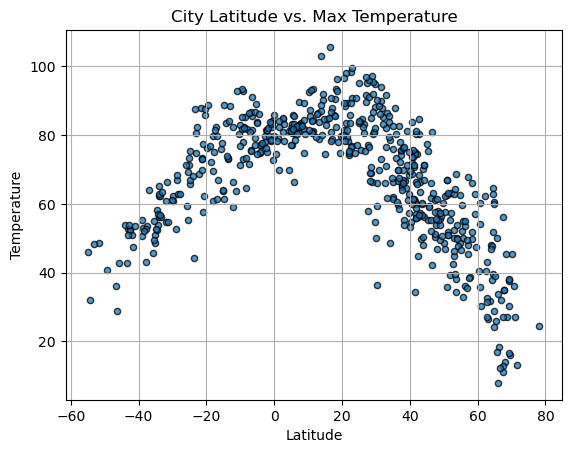

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o",s=20,alpha=.75, edgecolors="k")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature")

plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

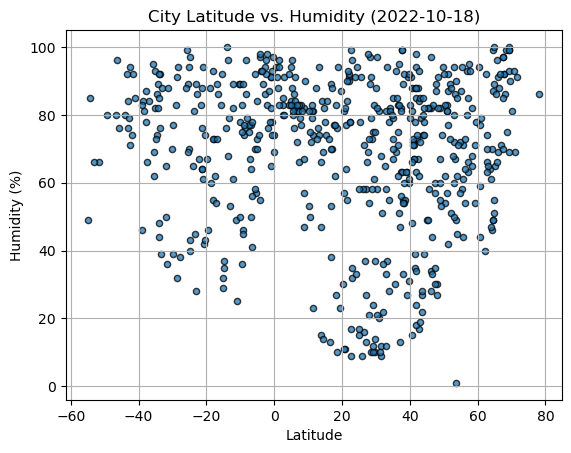

In [13]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o",s=20,alpha=.75, edgecolors="k")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity (2022-10-18)")

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

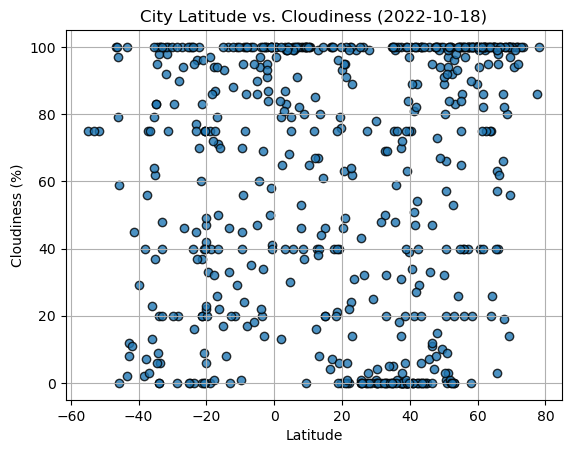

In [ ]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

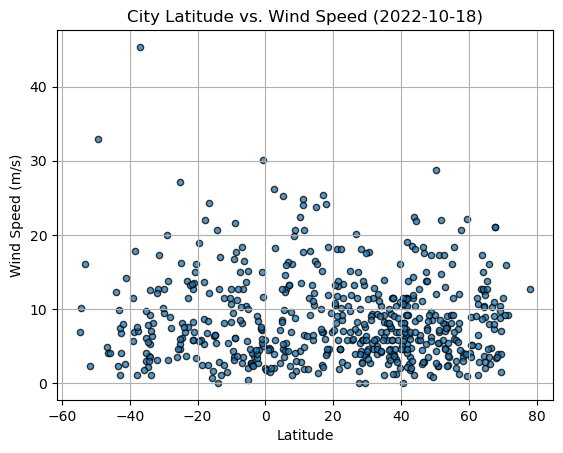

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o",s=20,alpha=.75, edgecolors="k")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed (2022-10-18)")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def linear_regress(x_values, y_values, regress_val, line_eq):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_val = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f"The r-squared is: {rvalue**2}")
    print(max(x_values))
    print(max(y_values))
    plt.annotate(line_eq,xy=(min(x_values)+20,min(y_values)+20),fontsize=15,color="orange")
    plt.scatter(x_values,y_values,c='b')
    plt.plot(x_values,regress_val,"r-")

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df['Lat']>=0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,clovis,36.8252,-119.7029,82.62,51,40,4.61,US,1716056896
2,ust-nera,64.5667,143.2000,39.54,99,100,3.65,RU,1716056644
3,hami,42.8000,93.4500,80.26,17,100,3.47,CN,1716057134
4,iskateley,67.6803,53.1512,35.02,92,100,21.00,RU,1716057134
6,kudahuvadhoo,2.6708,72.8944,84.65,80,100,26.17,MV,1716057135


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df['Lat']<0)]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,32.18,85,88,10.16,GS,1716056601
5,sao jose da coroa grande,-8.8978,-35.1478,82.45,74,4,6.08,BR,1716057135
8,edinburgh of the seven seas,-37.0676,-12.3116,64.04,84,98,45.37,SH,1716056581
11,port-aux-francais,-49.3500,70.2167,40.89,80,85,32.88,TF,1716056281
12,kerikeri,-35.2268,173.9474,50.92,93,6,3.00,NZ,1716056680


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.651983644570122
78.2186
105.69


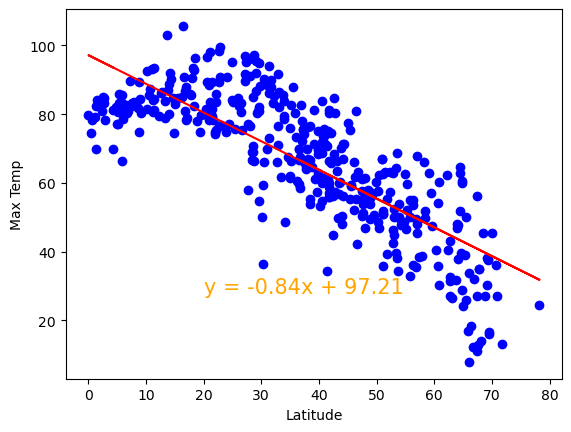

In [18]:
# Linear regression on Northern Hemisphere
regress_val = ''
line_eq = ''
linear_regress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], regress_val,line_eq)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

The r-squared is: 0.6960063907854975
-0.1303
93.43


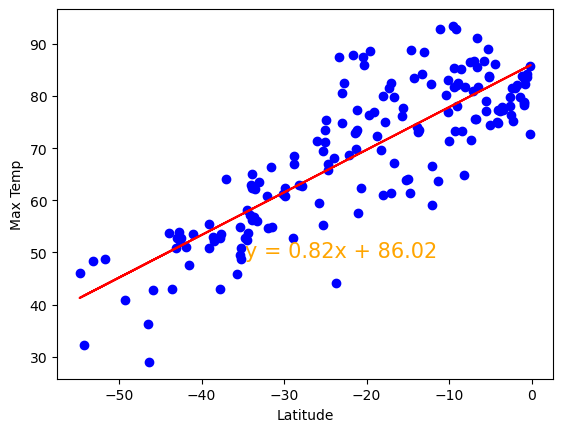

In [19]:
# Linear regression on Southern Hemisphere
regress_val = ''
line_eq = ''
linear_regress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], regress_val,line_eq)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.0017572304679504876
78.2186
100


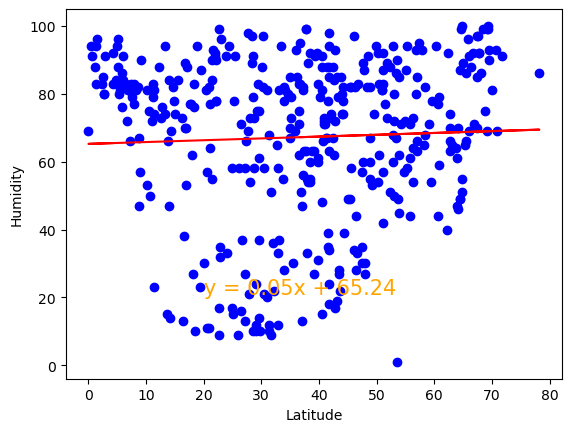

In [22]:
# Northern Hemisphere
regress_val = ''
line_eq = ''
linear_regress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], regress_val,line_eq)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

The r-squared is: 0.00046674383852220587
-0.1303
100


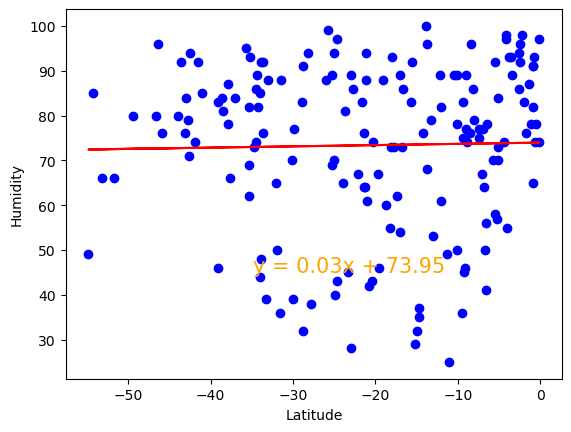

In [23]:
# Southern Hemisphere
regress_val = ''
line_eq = ''
linear_regress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], regress_val,line_eq)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 4.814443104428397e-05
78.2186
100


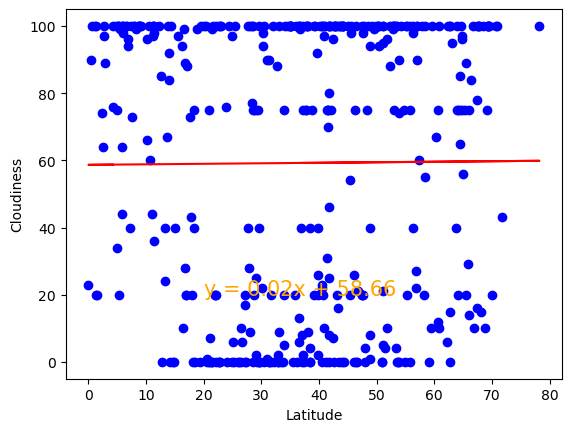

In [24]:
# Northern Hemisphere
regress_val = ''
line_eq = ''
linear_regress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], regress_val,line_eq)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

The r-squared is: 0.03475981842113691
-0.1303
100


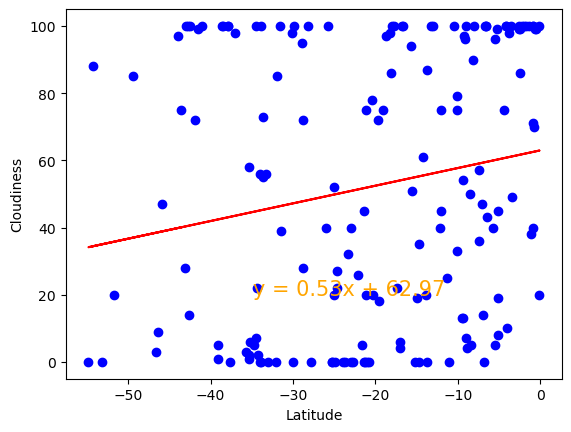

In [25]:
# Southern Hemisphere
regress_val = ''
line_eq = ''
linear_regress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], regress_val,line_eq)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0038439179973119987
78.2186
28.77


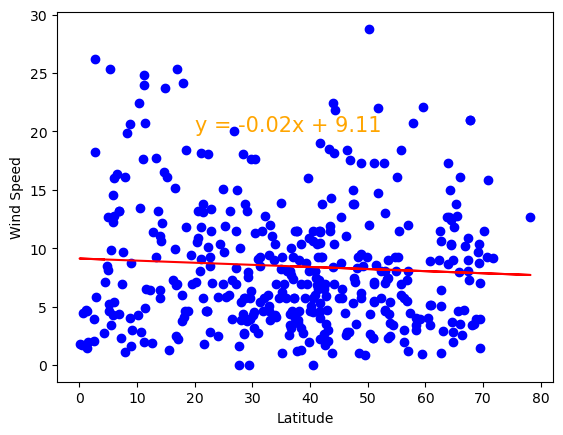

In [26]:
# Northern Hemisphere
regress_val = ''
line_eq = ''
linear_regress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], regress_val,line_eq)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

The r-squared is: 0.0020694141760898804
-0.1303
45.37


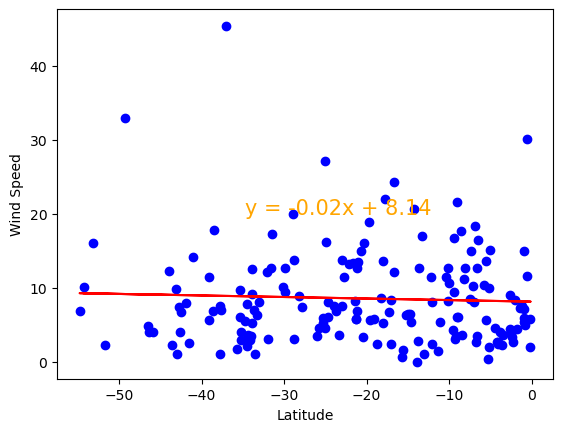

In [27]:
# Southern Hemisphere
regress_val = ''
line_eq = ''
linear_regress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], regress_val,line_eq)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE